In [77]:

import glob
import os
import numpy as np


# Se lee un ejemplo de ham e imprime


In [78]:
file_path = 'enron1/ham/0007.1999-12-14.farmer.ham.txt'
with open(file_path, 'r') as infile:
    ham_sample = infile.read()
print(ham_sample)


Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


# Se lee un ejemplo de spam e imprime


In [79]:
file_path = 'enron1/spam/0058.2003-12-21.GP.spam.txt'
with open(file_path, 'r') as infile:
    spam_sample = infile.read()
print(spam_sample)


Subject: stacey automated system generating 8 k per week parallelogram
people are
getting rich using this system ! now it ' s your
turn !
we ' ve
cracked the code and will show you . . . .
this is the
only system that does everything for you , so you can make
money
. . . . . . . .
because your
success is . . . completely automated !
let me show
you how !
click
here
to opt out click here % random _ text



# Se leeen los archivos
Se lee cada uno de los archivos que existen en spam y se almacenan

In [80]:
import glob
import os
import numpy as np 

emails, labels = [], []

file_path = 'enron1/spam/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding = "ISO-8859-1") as infile:
        emails.append(infile.read())
        labels.append(1)

 Se lee cada uno de los archivos que existen en ham y se almacenan

In [81]:
file_path = 'enron1/ham/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding = "ISO-8859-1") as infile:
        emails.append(infile.read())
        labels.append(0)

In [82]:
len(emails)
len(labels)

5172

# Se remuven signos de puntuación y stop words

In [83]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

def letters_only(astr):
    return astr.isalpha()


all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(' '.join([lemmatizer.lemmatize(word.lower())
                                        for word in doc.split()
                                        if letters_only(word)
                                        and word not in all_names]))
    return cleaned_docs


In [84]:
cleaned_emails = clean_text(emails)
cleaned_emails[0]

'approval hello we sent you an email a while ago because you now qualify for a new mortgage you could get for a little a a month bad credit is no problem you can pull cash out or refinance please click on this link for free consultation by a mortgage broker start saving here best regard alejandra stern libreville juniper accord cervix ember freest episcopal kink agent buxom audiotape rand taurus tara thither butchery extraneous blatzcleat gaston stratosphere milky builtin do druid causation headquarter worktable glycerin despondent clipboard illegible controversy fail result routautonomy cloture withdrew crab hermetic trench befogging closure strongroom thurman batchelder sylvan depository beautiful suppressor sea houston blouse cup waffle felony chit thank maltose command frustrate arty empower habib margery scam jo farthest wilburmarc edgewise allah grumble consequential josiah avoid bloomington ubiquity cityscape bookcase amherst business bias matte'

# Vectorizar palabras
Se convierte en un vector unicamente con las 500 palabras que mas se repitan

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english", max_features=500)


In [86]:
term_docs = cv.fit_transform(cleaned_emails)
print(term_docs [0])

  (0, 390)	1
  (0, 121)	1
  (0, 285)	1
  (0, 242)	1
  (0, 276)	1
  (0, 341)	1
  (0, 66)	1
  (0, 239)	1
  (0, 158)	1
  (0, 409)	1
  (0, 36)	1
  (0, 362)	1
  (0, 370)	1
  (0, 188)	1
  (0, 437)	1
  (0, 44)	1


# Palabras con reeticiones

In [87]:
feature_names = cv.get_feature_names()
feature_names[481]
feature_names[357]
feature_names[125]


'energy'

In [88]:
feature_mapping = cv.vocabulary_

In [89]:
def get_label_index(labels):
    from collections import defaultdict
    label_index = defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index

In [90]:
label_index = get_label_index(labels)

In [104]:
 def get_prior(label_index):
    """ Compute prior based on training samples
    Args:
        label_index (grouped sample indices by class)
    Returns:
        dictionary, with class label as key, corresponding prior as the value
    """
    prior = {label: len(index) for label, index in label_index.items()}
    total_count = sum(prior.values())
    for label in prior:
        prior[label] /= float(total_count)
    return prior

prior = get_prior(label_index)
 

In [105]:
def get_likelihood(term_document_matrix, label_index, smoothing=0):
    """ Compute likelihood based on training samples
    Args:
        term_document_matrix (sparse matrix)
        label_index (grouped sample indices by class)
        smoothing (integer, additive Laplace smoothing parameter)
    Returns:
        dictionary, with class as key, corresponding conditional probability P(feature|class) vector as value
    """
    likelihood = {}
    for label, index in label_index.items():
        likelihood[label] = term_document_matrix[index, :].sum(axis=0) + smoothing
        likelihood[label] = np.asarray(likelihood[label])[0]
        total_count = likelihood[label].sum()
        likelihood[label] = likelihood[label] / float(total_count)
    return likelihood


In [106]:
smoothing = 1
likelihood = get_likelihood(term_docs, label_index, smoothing)
len(likelihood[0])

500

In [107]:
likelihood[0][:5]

array([0.00108581, 0.00095774, 0.00087978, 0.00084637, 0.00010023])

In [108]:
likelihood[1][:5]

array([0.00108997, 0.00141902, 0.00456555, 0.0005347 , 0.00421594])

In [109]:
feature_names[:5]

['able', 'access', 'account', 'accounting', 'act']

In [110]:

def get_posterior(term_document_matrix, prior, likelihood):
    """ Compute posterior of testing samples, based on prior and likelihood
    Args:
        term_document_matrix (sparse matrix)
        prior (dictionary, with class label as key, corresponding prior as the value)
        likelihood (dictionary, with class label as key, corresponding conditional probability vector as value)
    Returns:
        dictionary, with class label as key, corresponding posterior as value
    """
    num_docs = term_document_matrix.shape[0]
    posteriors = []
    for i in range(num_docs):
        # posterior is proportional to prior * likelihood
        # = exp(log(prior * likelihood))
        # = exp(log(prior) + log(likelihood))
        posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_document_matrix.getrow(i)
            counts = term_document_vector.data
            indices = term_document_vector.indices
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index]) * count
        # exp(-1000):exp(-999) will cause zero division error,
        # however it equates to exp(0):exp(1)
        min_log_posterior = min(posterior.values())
        for label in posterior:
            try:
                posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except:
                # if one's log value is excessively large, assign it infinity
                posterior[label] = float('inf')
        # normalize so that all sums up to 1
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors

In [111]:
emails_test = [
    '''Subject: flat screens
    hello ,
    please call or contact regarding the other flat screens requested .
    trisha tlapek - eb 3132 b
    michael sergeev - eb 3132 a
    also the sun blocker that was taken away from eb 3131 a .
    trisha should two monitors also michael .
    thanks
    kevin moore''',
    '''Subject: having problems in bed ? we can help !
    cialis allows men to enjoy a fully normal sex life without having to plan the sexual act .
    if we let things terrify us , life will not be worth living .
    brevity is the soul of lingerie .
    suspicion always haunts the guilty mind .''',
]

In [112]:

cleaned_test = clean_text(emails_test)
term_docs_test = cv.transform(cleaned_test)
posterior = get_posterior(term_docs_test, prior, likelihood)
print(posterior)

[{1: 0.0032745671008376, 0: 0.9967254328991624}, {1: 0.9999984725538845, 0: 1.5274461154428757e-06}]


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)


In [114]:
len(X_train), len(Y_train)
len(X_test), len(Y_test)

(1707, 1707)

In [115]:
term_docs_train = cv.fit_transform(X_train)
label_index = get_label_index(Y_train)
prior = get_prior(label_index)
likelihood = get_likelihood(term_docs_train, label_index, smoothing)


In [116]:
term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)


/home/victor/Documentos/Maestria/Cuatrimestre 2/Inteligencia Artifical/carpeta/env/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


In [117]:
correct = 0.0
for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5:
            correct += 1
    elif pred[0] > 0.5:
        correct += 1

print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))



The accuracy on 1707 testing samples is: 90.8%


# implementar desde 0



In [118]:
from sklearn.naive_bayes import MultinomialNB

In [119]:
clf = MultinomialNB(alpha=1.0, fit_prior=True)

Se entrena el clasificador

In [120]:
clf.fit(term_docs_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
Se obtienen los resultdos

SyntaxError: invalid syntax (<ipython-input-121-7ae0d7e632cf>, line 1)

In [124]:
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:10]

array([[1.00000000e+000, 1.39236011e-026],
       [1.00000000e+000, 1.23720860e-017],
       [3.30065914e-048, 1.00000000e+000],
       [1.00000000e+000, 6.39079016e-019],
       [1.00000000e+000, 6.50186709e-134],
       [5.12242799e-002, 9.48775720e-001],
       [7.94329755e-006, 9.99992057e-001],
       [1.00000000e+000, 2.79114149e-014],
       [1.00000000e+000, 1.15975887e-056],
       [3.27858452e-014, 1.00000000e+000]])

In [125]:
# Se precide "term_docs_test"

In [126]:
prediction = clf.predict(term_docs_test)
prediction[:10]a

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

# Eficiencia de multinomialNB

In [128]:
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))



The accuracy using MultinomialNB is: 90.8%


# Medidas de eficiencia
Matriz d confusión

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0, 1])

array([[1093,   98],
       [  59,  457]])

# Otras medidas de eficacia a un modelo

In [133]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(Y_test, prediction, pos_label=1)
recall_score(Y_test, prediction, pos_label=1)
f1_score(Y_test, prediction, pos_label=1)


0.8534080298786182

# Validar la efiiencia en una sola vez, en lugar de llamar cada metodo por separado

In [134]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1191
           1       0.82      0.89      0.85       516

    accuracy                           0.91      1707
   macro avg       0.89      0.90      0.89      1707
weighted avg       0.91      0.91      0.91      1707



ReceiverOperating Characteristic (ROC) is a united measurement frequently used in binary classification

In [135]:
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

In [136]:

true_pos_rate = [tp / 516.0 for tp in true_pos]
false_pos_rate = [fp / 1191.0 for fp in false_pos]

No handles with labels found to put in legend.


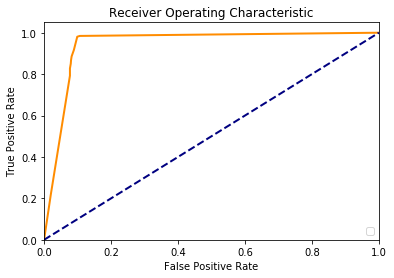

In [137]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)




0.9814311594202898

# Model tuning and cross-validation

In [143]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)
# convert to numpy array for more efficient slicing
cleaned_emails_np = np.array(cleaned_emails)
labels_np = np.array(labels)


In [144]:

max_features_option = [2000, 4000, 8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}


In [145]:
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words="english", max_features=max_features)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for smoothing_factor in smoothing_factor_option:
            if smoothing_factor not in auc_record[max_features]:
                auc_record[max_features][smoothing_factor] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing_factor, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][smoothing_factor][fit_prior] \
                    = auc + auc_record[max_features][smoothing_factor].get(fit_prior, 0.0)

In [146]:

print(auc_record)

print('max features  smoothing  fit prior  auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print('       {0}      {1}      {2}    {3:.4f}'.format(max_features, smoothing, fit_prior, auc/k))

{2000: {0.5: {True: 9.77474356316392, False: 9.77582365833432}, 1.0: {True: 9.761405885953481, False: 9.761287564664535}, 1.5: {True: 9.75038682719267, False: 9.748906354894759}, 2.0: {True: 9.741428370453738, False: 9.741290945977966}}, 4000: {0.5: {True: 9.84805105536469, False: 9.847871105319276}, 1.0: {True: 9.833417964893574, False: 9.832484080677643}, 1.5: {True: 9.823895322434149, False: 9.823942512735456}, 2.0: {True: 9.81700608142795, False: 9.815400006910714}}, 8000: {0.5: {True: 9.885311179560084, False: 9.885610857718278}, 1.0: {True: 9.875462548868617, False: 9.874853961813372}, 1.5: {True: 9.868598902183784, False: 9.869316431702405}, 2.0: {True: 9.865758080598663, False: 9.866130419973937}}}
max features  smoothing  fit prior  auc
       2000      0.5      True    0.9775
       2000      0.5      False    0.9776
       2000      1.0      True    0.9761
       2000      1.0      False    0.9761
       2000      1.5      True    0.9750
       2000      1.5      False    0.